# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


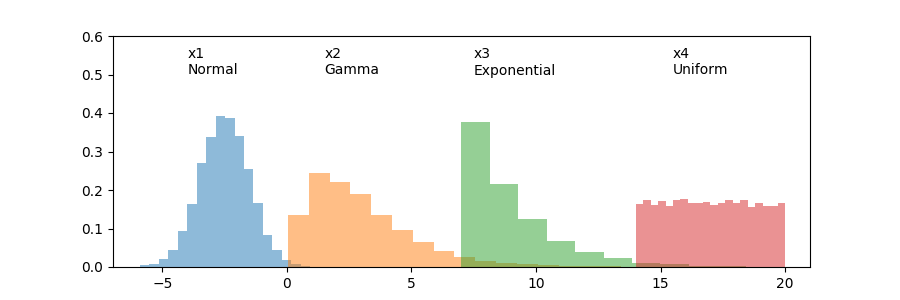

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [5]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>


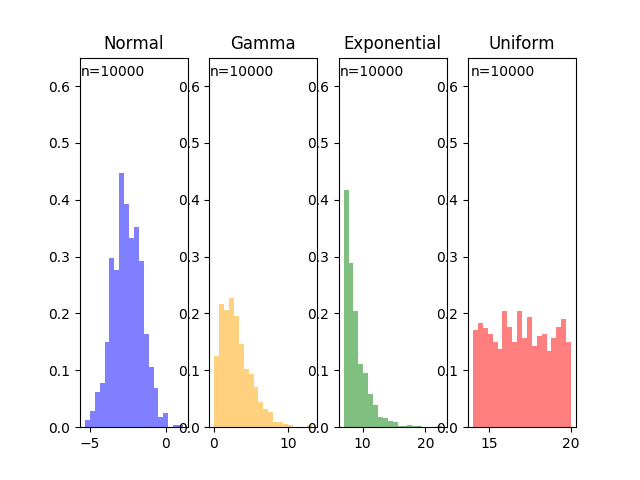

In [6]:
# Animation
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(1, 4,sharey=True)

axs = [ax1,ax2,ax3,ax4]

ds = [x1, x2, x3, x4]

names = ['Normal', 'Gamma', 'Exponential', 'Uniform']

colors = ['blue', 'orange', 'green', 'red']

def update(curr):
    if curr >=100:
        a.event_source.stop()
    for i,ax in enumerate(axs):
        ax.clear()
        ax.hist(ds[i][100:100+ curr*10],
            normed=True, bins=20, alpha=0.5,color=colors[i])
        ax.set_title(names[i])
        ax.set_ylim(0,.65)
# You can use either text or annotate
        #ax.text(.9*np.median(ax.get_xlim()),.9*ax.get_ylim()[-1],"n={:}".format(100*curr))
        ax.annotate('n={:}'.format(100*curr),(abs(.01*np.median(ax.get_xlim()))+ax.get_xlim()[0],.95*ax.get_ylim()[-1]))
a = animation.FuncAnimation(fig, update, interval=100)



Classnotes:
Those of the bayesian persuasion tend to use the gamma as a prior for the exponential and poisson 
(among others) since these two last distributions are in the same "rate" sub-family of distributions 
as the gamma (all three are in the exponential family of distributions, but the exponential and 
poisson distributions are typically used to model "rates", and the gamma distribution can be recast to 
have a "rate" interpretation). Econometricians tend to use this distribution for modelling "waiting times" 
(time until something happens); although we tend to favor either the exponential or poisson distributions 
for this. Frequentists tend to use the gamma distribution to a lesser degree than bayesian 
statisticians/econometricians.